### Customer segmentation and clustering
Customer segmentation and clustering are two techniques used in marketing to group customers based on their characteristics or behaviors. Although they share some similarities, there are also some differences between the two.

Customer segmentation involves dividing a customer base into smaller groups or segments based on shared characteristics such as demographics, psychographics, or behaviors. This can help businesses to target specific customer groups with tailored marketing messages and offerings. Customer segmentation is typically based on pre-defined criteria or variables, and the segmentation process is usually guided by business objectives and marketing strategies.

On the other hand, clustering is a data-driven technique that involves grouping customers based on their similarities and differences in behaviors or attributes. Clustering algorithms analyze customer data to identify groups of customers that have similar patterns or characteristics. The algorithm can identify these groups automatically, without the need for pre-defined segmentation criteria or business objectives.

While customer segmentation is often guided by pre-defined criteria, clustering is more flexible and can uncover previously unknown patterns or relationships in customer data. Clustering can be useful in identifying potential customer segments that may not have been considered previously, and can also help businesses to refine their segmentation strategies based on more granular and detailed data.

<strong>Table of Contents</strong>
1. Rule-Based Segmentation 
2. KMeans Algorithm 
3. PCA 
4. Deriving Clusters

#### Issue with KMeans make sure you upgrade this for the algoritmn section
pip install --upgrade threadpoolctl

In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Segmentation-Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Rule Based Segmentation (Percentile Method)

Segmentation based on percentile method is a technique used in marketing to divide customers into segments based on their position within a distribution. This method involves dividing a customer base into equal-sized segments or percentiles based on a particular variable such as purchase frequency, lifetime value, or engagement score.

For example, if a company wants to segment its customer base based on purchase frequency, it could divide the customer base into five equal-sized segments or quintiles based on the number of purchases made in the past year. Customers who fall within the top 20% of purchase frequency would be in the highest percentile or segment, while those who fall within the bottom 20% would be in the lowest percentile or segment.

Segmentation based on percentile method can be useful in identifying and targeting high-value customers or those with particular characteristics or behaviors. For example, a company may want to target customers in the highest percentile of lifetime value with special promotions or rewards to encourage loyalty and repeat business. Similarly, a company may want to target customers in the lowest percentile of engagement score with personalized marketing campaigns to re-engage them and increase their level of engagement.

The advantage of percentile segmentation is that it is easy to understand and implement, and can provide a quick way to identify customer segments based on key variables. However, it may not always capture the full complexity of customer behavior or preferences, and additional analysis may be required to gain a deeper understanding of customer segments and their needs.

In [6]:
data['Gender'].value_counts(normalize =True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

In [7]:
data['Age'].max()

70

In [8]:
data['Age'].min()

18

In [9]:
p1, p2 = np.percentile(data['Age'], [33.3, 66.6])
p1

31.0

In [10]:
data['Age Bin']=np.where(data['Age']>p2,'High',
                         np.where(data['Age']>p1,'Medium','Low'))
data['Age Bin'].value_counts()

Low       70
High      66
Medium    64
Name: Age Bin, dtype: int64

In [11]:
# Create a function to bin our data
def Binner(var,data):
    p1, p2 = np.percentile(data[var], [33.3, 66.6])
    data[var+'Bin']=np.where(data[var]>p2,
                             'High',np.where(data[var]>p1,'Medium','Low'))

In [12]:
Binner('Annual Income (k$)',data)
Binner('Spending Score (1-100)',data)

In [13]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Bin,Annual Income (k$)Bin,Spending Score (1-100)Bin
0,1,Male,19,15,39,Low,Low,Low
1,2,Male,21,15,81,Low,Low,High
2,3,Female,20,16,6,Low,Low,Low
3,4,Female,23,16,77,Low,Low,High
4,5,Female,31,17,40,Low,Low,Low


In [14]:
#analyzing data categories
data.groupby(['Gender','Age Bin',
              'Annual Income (k$)Bin',
              'Spending Score (1-100)Bin']).mean()[["Age",
                                                    "Annual Income (k$)",
                                                    "Spending Score (1-100)"]]

Age  \
Gender Age Bin Annual Income (k$)Bin Spending Score (1-100)Bin              
Female High    High                  Low                        52.166667   
               Low                   Low                        53.500000   
                                     Medium                     55.571429   
               Medium                Medium                     54.000000   
       Low     High                  High                       29.375000   
                                     Low                        28.000000   
               Low                   High                       24.333333   
                                     Low                        25.500000   
                                     Medium                     29.000000   
               Medium                High                       31.000000   
                                     Low                        23.666667   
                                     Medium                     21.250000   
       Medium  High                  High                       34.454545   
                                     Low                        39.555556   
               Low                   High                       35.000000   
                                     Low                        38.833333   
                                     Medium                     37.500000   
               Medium                High                       34.000000   
                                     Low                        39.000000   
                                     Medium                     38.750000   
Male   High    High                  Low                        52.200000   
               Low                   High                       59.000000   
                                     Low                        55.857143   
                                     Medium                     63.750000   
               Medium                Low                        57.666667   
                                     Medium                     58.250000   
       Low     High                  High                       28.500000   
                                     Low                        20.750000   
               Low                   High                       23.750000   
                                     Low                        19.000000   
                                     Medium                     18.666667   
               Medium                Low                        18.000000   
                                     Medium                     23.666667   
       Medium  High                  High                       34.000000   
                                     Low                        37.125000   
               Low                   High                       34.000000   
                                     Low                        36.000000   
               Medium                High                       39.000000   
                                     Low                        43.000000   
                                     Medium                     39.000000   

                                                                Annual Income (k$)  \
Gender Age Bin Annual Income (k$)Bin Spending Score (1-100)Bin                       
Female High    High                  Low                                 90.166667   
               Low                   Low                                 30.500000   
                                     Medium                              44.428571   
               Medium                Medium                              58.666667   
       Low     High                  High                                81.625000   
                                     Low                                 76.000000   
               Low                   High                                27.583333   
                                     Low                     

In [15]:
data.groupby(['Gender','Age Bin',
              'Annual Income (k$)Bin',
              'Spending Score (1-100)Bin'])\
                .count()[["CustomerID"]].sort_values(by='CustomerID',
                                                    ascending=False)

CustomerID
Gender Age Bin Annual Income (k$)Bin Spending Score (1-100)Bin            
Female High    Medium                Medium                             15
       Low     Low                   High                               12
Male   High    Medium                Medium                             12
Female Medium  High                  High                               11
                                     Low                                 9
       Low     High                  High                                8
Male   Medium  High                  Low                                 8
                                     High                                8
       Low     Low                   High                                8
Female Low     Medium                Medium                              8
Male   High    Low                   Low                                 7
Female High    Low                   Medium                              7
       Medium  Low                   Low                                 6
       High    High                  Low                                 6
Male   Low     High                  High                                6
Female High    Low                   Low                                 6
Male   Low     Medium                Medium                              6
       High    High                  Low                                 5
Female Low     Low                   Medium                              5
Male   Medium  Medium                High                                4
       High    Low                   Medium                              4
       Low     High                  Low                                 4
Female Medium  Medium                Medium                              4
Male   Low     Low                   Medium                              3
       High    Medium                Low                                 3
Female Low     Medium                Low                                 3
       Medium  Medium                Low                                 2
Male   Medium  Low                   Low                                 2
                                     High                                2
Female Low     Low                   Low                                 2
Male   Medium  Medium                Medium                              2
Female Low     Medium                High                                2
       Medium  Low                   High                                2
                                     Medium                              2
Male   Low     Medium                Low                                 1
Female Low     High                  Low                                 1
Male   High    Low                   High                                1
Female Medium  Medium                High                                1
Male   Medium  Medium                Low                                 1
       Low     Low                   Low                                 1

### Unsupervised Segmentation (K-Means Algorithm)

Clustering analysis using K-means is a popular technique used in data mining and machine learning to group similar data points together based on their similarities and differences. K-means is an unsupervised learning algorithm that aims to partition a given dataset into k clusters or groups, with each cluster representing a distinct group of data points.

The K-means algorithm works by first randomly selecting k initial centroids, which are the centers of each cluster. Then, the algorithm iteratively assigns each data point to the closest centroid and computes the new centroids for each cluster based on the mean of the data points assigned to it. This process is repeated until the centroids converge and no further changes are observed.

One of the advantages of K-means clustering is its simplicity and scalability, as it can handle large datasets with many features. It is also easy to interpret and can be used for a wide range of applications such as customer segmentation, fraud detection, and image recognition.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [17]:
num_clusters = 3
X = data[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
# Initialize the KMeans algorithm
kmeans = KMeans(n_clusters=num_clusters,random_state=0)
# Fit the algorithm to the data
kmeans.fit(X)
# Get the cluster labels for each data point
labels = kmeans.predict(X)
# Get the centroids for each cluster
centroids = kmeans.cluster_centers_


In [18]:
centroids

array([[40.39473684, 87.        , 18.63157895],
       [32.69230769, 86.53846154, 82.12820513],
       [40.32520325, 44.15447154, 49.82926829]])

In [19]:
cluster_labels = kmeans.predict(X)
data['Cluster Name']=cluster_labels
data.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Bin,Annual Income (k$)Bin,Spending Score (1-100)Bin,Cluster Name
81,82,Male,38,54,55,Medium,Medium,Medium,2
4,5,Female,31,17,40,Low,Low,Low,2
1,2,Male,21,15,81,Low,Low,High,2
72,73,Female,60,50,49,High,Medium,Medium,2
97,98,Female,27,60,50,Low,Medium,Medium,2
147,148,Female,32,77,74,Medium,High,High,1
23,24,Male,31,25,73,Low,Low,High,2
165,166,Female,36,85,75,Medium,High,High,1
101,102,Female,49,62,48,High,Medium,Medium,2
167,168,Female,33,86,95,Medium,High,High,1


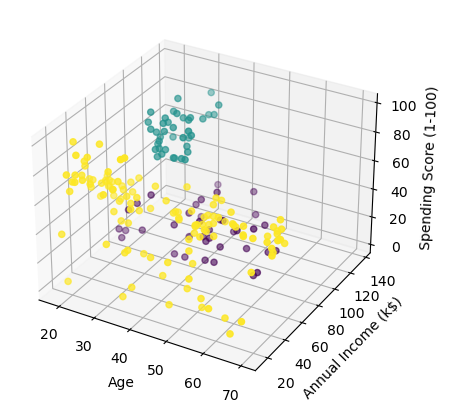

In [20]:
#visualizing clusters
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# plot the clusters in 3D
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['Age'], X["Annual Income (k$)"], X["Spending Score (1-100)"], c=kmeans.labels_)
ax.set_xlabel('Age')
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
plt.show()

### Dimension Reduction (PCA Plots) - 2D plots

Dimension reduction is the process of reducing the number of variables or dimensions in a dataset while retaining as much relevant information as possible. In the context of K-means clustering, dimension reduction can be useful for reducing the computational complexity of the algorithm, as well as for improving the accuracy and interpretability of the results.

One common approach to dimension reduction in K-means clustering is principal component analysis (PCA). PCA is a technique that transforms the original variables into a new set of linearly uncorrelated variables, called principal components, that capture the maximum amount of variation in the data.

PCA can be applied to the original dataset before clustering to reduce the dimensionality of the data, or it can be applied to the cluster centroids to simplify their representation. In either case, PCA can help reduce the noise and redundancy in the data and improve the clustering performance by highlighting the most important variables.

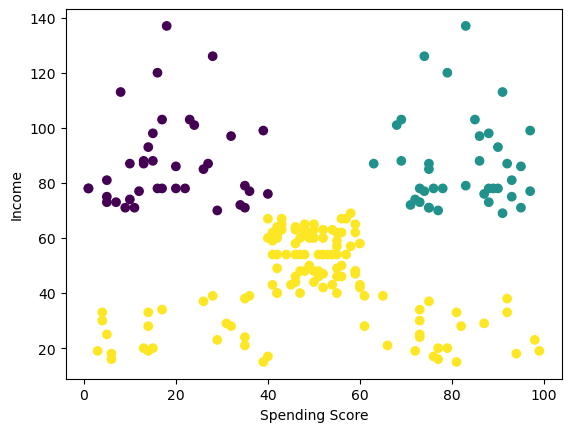

In [21]:
# plot the clusters in 2D, however which variables do we choose
plt.scatter(data['Spending Score (1-100)'],data['Annual Income (k$)'], c=kmeans.labels_)
plt.xlabel('Spending Score')
plt.ylabel('Income')
plt.show()

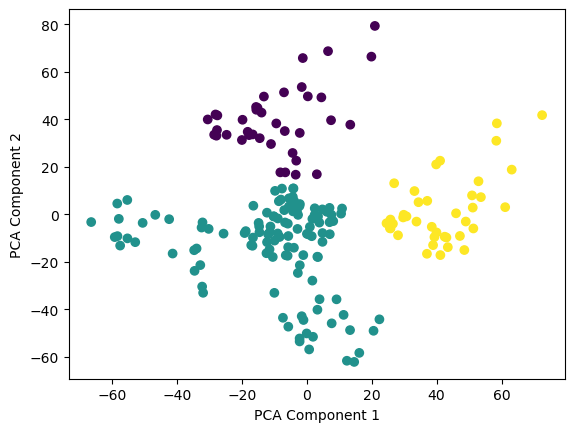

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# apply K-means clustering
kmeans = KMeans(n_clusters=3,random_state=0)
kmeans.fit(X_pca)

# plot the clusters in 2D
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

### Deriving Insights From Unsupervised Clusters Features

Deriving rules after clustering involves interpreting the results of a clustering analysis to extract meaningful and actionable insights. Once the clusters have been identified, the next step is to analyze the characteristics of each cluster and develop rules or criteria based on their common traits.

1. Compute the mean of all the attributes grouped by the clusters 
2. Compute the median of all the attributes grouped by the clusters
3. Try to identify all the differences in the attribute mean and median
4. Device Strategies based on the clusters

In [23]:
data.groupby('Cluster Name')["Age", "Annual Income (k$)", "Spending Score (1-100)"].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster Name,,,
0,40.394737,87.000000,18.631579
1,32.692308,86.538462,82.128205
2,40.325203,44.154472,49.829268


In [24]:
data.groupby('Cluster Name')["Age", "Annual Income (k$)", "Spending Score (1-100)"].median()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster Name,,,
0,41.5,80.0,16.5
1,32.0,79.0,83.0
2,38.0,46.0,50.0


In [35]:
pd.crosstab(data['Cluster Name'],data['Gender'],normalize='index')

Gender,Female,Male
Cluster Name,,
0,0.473684,0.526316
1,0.538462,0.461538
2,0.593496,0.406504


### How to determine the numbers of clusters

#### Elbow Method:
The elbow method works by plotting the sum of squared distances between each data point and its assigned centroid (also known as the within-cluster sum of squares or WCSS) against the number of clusters. The optimal number of clusters is the point of inflection (or "elbow") in the curve. Here's an example code:

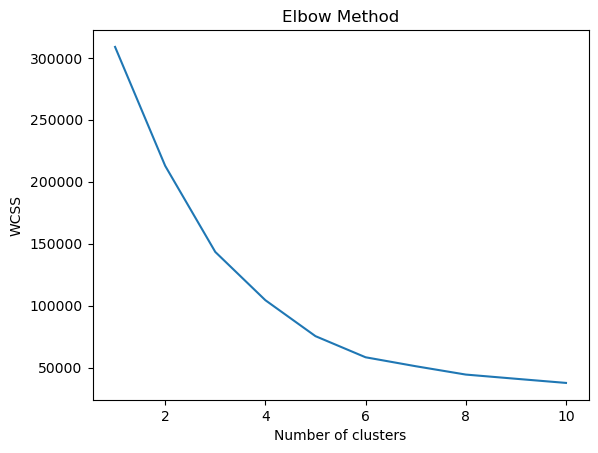

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Run k-means clustering for k=1 to 10 clusters
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++',
                    max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### Silhouette Analysis:
Silhouette analysis measures how similar each data point is to its assigned cluster compared to other clusters. The optimal number of clusters is the one that maximizes the average silhouette score across all data points. Here's an example code:

Silhouette score is a measure of how well each data point fits into its assigned cluster based on the distance between the point and the other points in its own cluster versus the distance between the point and the other points in the next closest cluster.

The silhouette score ranges from -1 to 1. A score of +1 indicates that the data point is very well matched to its assigned cluster, while a score of -1 indicates that the data point is better matched to the neighboring cluster. A score of 0 indicates that the point is on the boundary between two clusters.

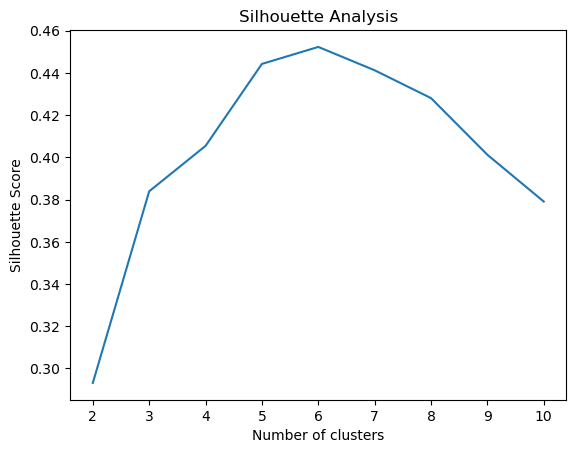

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np


# Run k-means clustering for k=2 to 10 clusters
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++',
                    max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()
